<a href="https://colab.research.google.com/github/abdulwasaeee/Pytorch-Bootcamp/blob/main/pytorch-linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [7]:
class LM(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer= nn.Linear(in_features=1, out_features=1)

  def forward(self,x):
    return self.linear_layer(x)

In [3]:
w= 0.7
b=0.3
x= torch.arange(0,1,0.02).unsqueeze(dim=1)
x

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [4]:
y=w*x+b

In [15]:
trainsplit=int(0.8*len(x))
xtrain, ytrain= x[:trainsplit], y[:trainsplit]
xtest,  ytest= x[trainsplit:], y[trainsplit:]

In [5]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
model=LM()

In [10]:
next(model.parameters()).device

device(type='cpu')

In [12]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [13]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8189]], device='cuda:0')),
             ('linear_layer.bias', tensor([-0.4538], device='cuda:0'))])

In [14]:
lossfn= nn.L1Loss()

opt= torch.optim.Adam(params=model.parameters(),lr=0.01)

In [22]:
torch.manual_seed(42)
epochs=100

xtrain=xtrain.to(device)
xtest=xtest.to(device)
ytrain=ytrain.to(device)
ytest=ytest.to(device)

for i in range(epochs):
  model.train()
  ypred=model(xtrain)
  loss=lossfn(ypred,ytrain)
  opt.zero_grad()
  loss.backward()
  opt.step()
  model.eval()
  with torch.inference_mode():
    testpred=model(xtest)
    testloss=lossfn(testpred,ytest)
  if i%10==0:
    print(f"epoch: {i} | trainloss: {loss} | testloss: {testloss}")

epoch: 0 | trainloss: 0.07553871721029282 | testloss: 0.1547338217496872
epoch: 10 | trainloss: 0.06475552916526794 | testloss: 0.1368638277053833
epoch: 20 | trainloss: 0.05359381437301636 | testloss: 0.11577407270669937
epoch: 30 | trainloss: 0.042066629976034164 | testloss: 0.09001901000738144
epoch: 40 | trainloss: 0.03018566407263279 | testloss: 0.06443196535110474
epoch: 50 | trainloss: 0.017969029024243355 | testloss: 0.036818455904722214
epoch: 60 | trainloss: 0.005436902400106192 | testloss: 0.009147805161774158
epoch: 70 | trainloss: 0.003994293510913849 | testloss: 0.008977198973298073
epoch: 80 | trainloss: 6.892457895446569e-05 | testloss: 0.0028991044964641333
epoch: 90 | trainloss: 0.001335898065008223 | testloss: 0.000981146120466292


In [23]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7031]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2989], device='cuda:0'))])

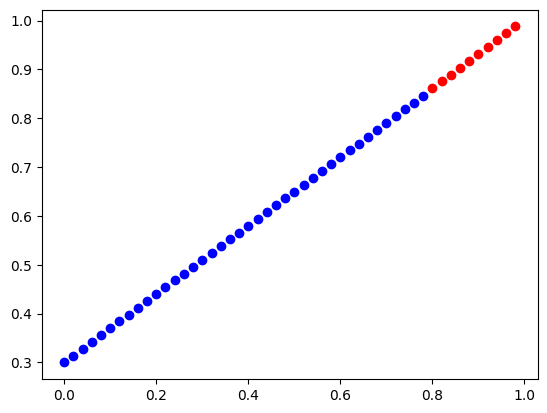

In [28]:
plt.scatter(xtrain.cpu(),ytrain.cpu(),c='b')
plt.scatter(xtest.cpu(),model(xtest).detach().cpu(),c='r')

In [29]:
torch.save(model,'model.pt')

In [31]:
m2=torch.load('model.pt',weights_only=False)
m2

LM(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [32]:
torch.save(model.state_dict(),'dict.pt')

In [34]:
m3=LM()
m3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

In [37]:
m3.load_state_dict(torch.load('dict.pt'))
m3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7031]])),
             ('linear_layer.bias', tensor([0.2989]))])